In [2]:
# 1. Gerekli Kütüphanelerin İçe Aktarılması
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import cv2
from skimage import exposure

In [3]:
# GitHub reposunu klonlayalım
!git clone https://github.com/hardik0/AI-for-Medicine-Specialization

# Çalışma dizinini ayarlayalım
%cd AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis/


Cloning into 'AI-for-Medicine-Specialization'...
remote: Enumerating objects: 1601, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 1601 (delta 9), reused 2 (delta 0), pack-reused 1573 (from 1)
Receiving objects: 100% (1601/1601), 720.36 MiB | 44.55 MiB/s, done.
Resolving deltas: 100% (30/30), done.
Updating files: 100% (1497/1497), done.
/content/AI-for-Medicine-Specialization/AI-for-Medical-Diagnosis


In [4]:
!ls


BraTS-Data  nih  Week-1  Week-2  Week-3


In [27]:
# 2. Veri Setinin Yüklenmesi
train_df = pd.read_csv("nih/train-small.csv")

# İlk 5 satırı göster
print("Veri setinin ilk 5 satırı:")
print(train_df.head())

# Boyut bilgisi
print(f'\nVeri setinde {train_df.shape[0]} satır ve {train_df.shape[1]} sütun bulunmaktadır.')

Veri setinin ilk 5 satırı:
              Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0    

Veri Seti Analizi:

Toplam 1000 görüntü içermektedir
Her görüntü için çeşitli hastalık durumları (0/1) belirtilmiştir
PatientId sütunu hasta kimlik bilgisini içermektedir

In [6]:

# İlk 5 satırı inceleyelim
train_df.head()

Image  Atelectasis  Cardiomegaly  Consolidation  Edema  \
0  00008270_015.png            0             0              0      0   
1  00029855_001.png            1             0              0      0   
2  00001297_000.png            0             0              0      0   
3  00012359_002.png            0             0              0      0   
4  00017951_001.png            0             0              0      0   

   Effusion  Emphysema  Fibrosis  Hernia  Infiltration  Mass  Nodule  \
0         0          0         0       0             0     0       0   
1         1          0         0       0             1     0       0   
2         0          0         0       0             0     0       0   
3         0          0         0       0             0     0       0   
4         0          0         0       0             1     0       0   

   PatientId  Pleural_Thickening  Pneumonia  Pneumothorax  
0       8270                   0          0             0  
1      29855                   0          0             0  
2       1297                   1          0             0  
3      12359                   0          0             0  
4      17951                   0          0             0

In [7]:
# 2. Veri Analizi
# Veri türlerini ve eksik değerleri inceleyelim
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Image               1000 non-null   object
 1   Atelectasis         1000 non-null   int64 
 2   Cardiomegaly        1000 non-null   int64 
 3   Consolidation       1000 non-null   int64 
 4   Edema               1000 non-null   int64 
 5   Effusion            1000 non-null   int64 
 6   Emphysema           1000 non-null   int64 
 7   Fibrosis            1000 non-null   int64 
 8   Hernia              1000 non-null   int64 
 9   Infiltration        1000 non-null   int64 
 10  Mass                1000 non-null   int64 
 11  Nodule              1000 non-null   int64 
 12  PatientId           1000 non-null   int64 
 13  Pleural_Thickening  1000 non-null   int64 
 14  Pneumonia           1000 non-null   int64 
 15  Pneumothorax        1000 non-null   int64 
dtypes: int64(15), object(1)
m

In [28]:
# Benzersiz hasta sayısını analiz edelim
unique_patients = train_df['PatientId'].nunique()
total_patients = train_df['PatientId'].count()
print(f"Toplam hasta sayısı: {total_patients}")
print(f"Benzersiz hasta sayısı: {unique_patients}")
print(f"Bazı hastaların birden fazla görüntüsü vardır.")

Toplam hasta sayısı: 1000
Benzersiz hasta sayısı: 928
Bazı hastaların birden fazla görüntüsü vardır.


In [30]:
# Toplam satır ve sütun sayısını yazdıralım
print(f'Veri setinin boyutu:')
print(f'Veri setinde {train_df.shape[0]} satır ve {train_df.shape[1]} sütun bulunmaktadır')

# Benzersiz hasta sayısını analiz edelim
print('\nHasta ID analizi:')
toplam_hasta = train_df['PatientId'].count()
benzersiz_hasta = train_df['PatientId'].nunique()
print(f"Toplam hasta kaydı sayısı: {toplam_hasta}")
print(f"Benzersiz hasta sayısı: {benzersiz_hasta}")
print(f"Bu durumda {toplam_hasta - benzersiz_hasta} adet tekrarlanan hasta kaydı bulunmaktadır.")

# Tekrarlanan hasta kayıtlarını gösterelim
tekrar_eden_hastalar = train_df[train_df.duplicated(['PatientId'], keep=False)]['PatientId'].value_counts()
if len(tekrar_eden_hastalar) > 0:
    print("\nBirden fazla görüntüsü olan hastaların dağılımı (ilk 5 örnek):")
    print(tekrar_eden_hastalar.head())

Veri setinin boyutu:
Veri setinde 1000 satır ve 16 sütun bulunmaktadır

Hasta ID analizi:
Toplam hasta kaydı sayısı: 1000
Benzersiz hasta sayısı: 928
Bu durumda 72 adet tekrarlanan hasta kaydı bulunmaktadır.

Birden fazla görüntüsü olan hastaların dağılımı (ilk 5 örnek):
PatientId
20213    6
13003    4
13111    4
26825    3
25628    3
Name: count, dtype: int64


In [10]:
# 3. Rastgele Görüntü Seçme ve Görselleştirme
# Rastgele 9 görüntü seçelim
images = train_df['Image'].values
random_images = np.random.choice(images, 9, replace=False)
img_dir = 'nih/images_small/'

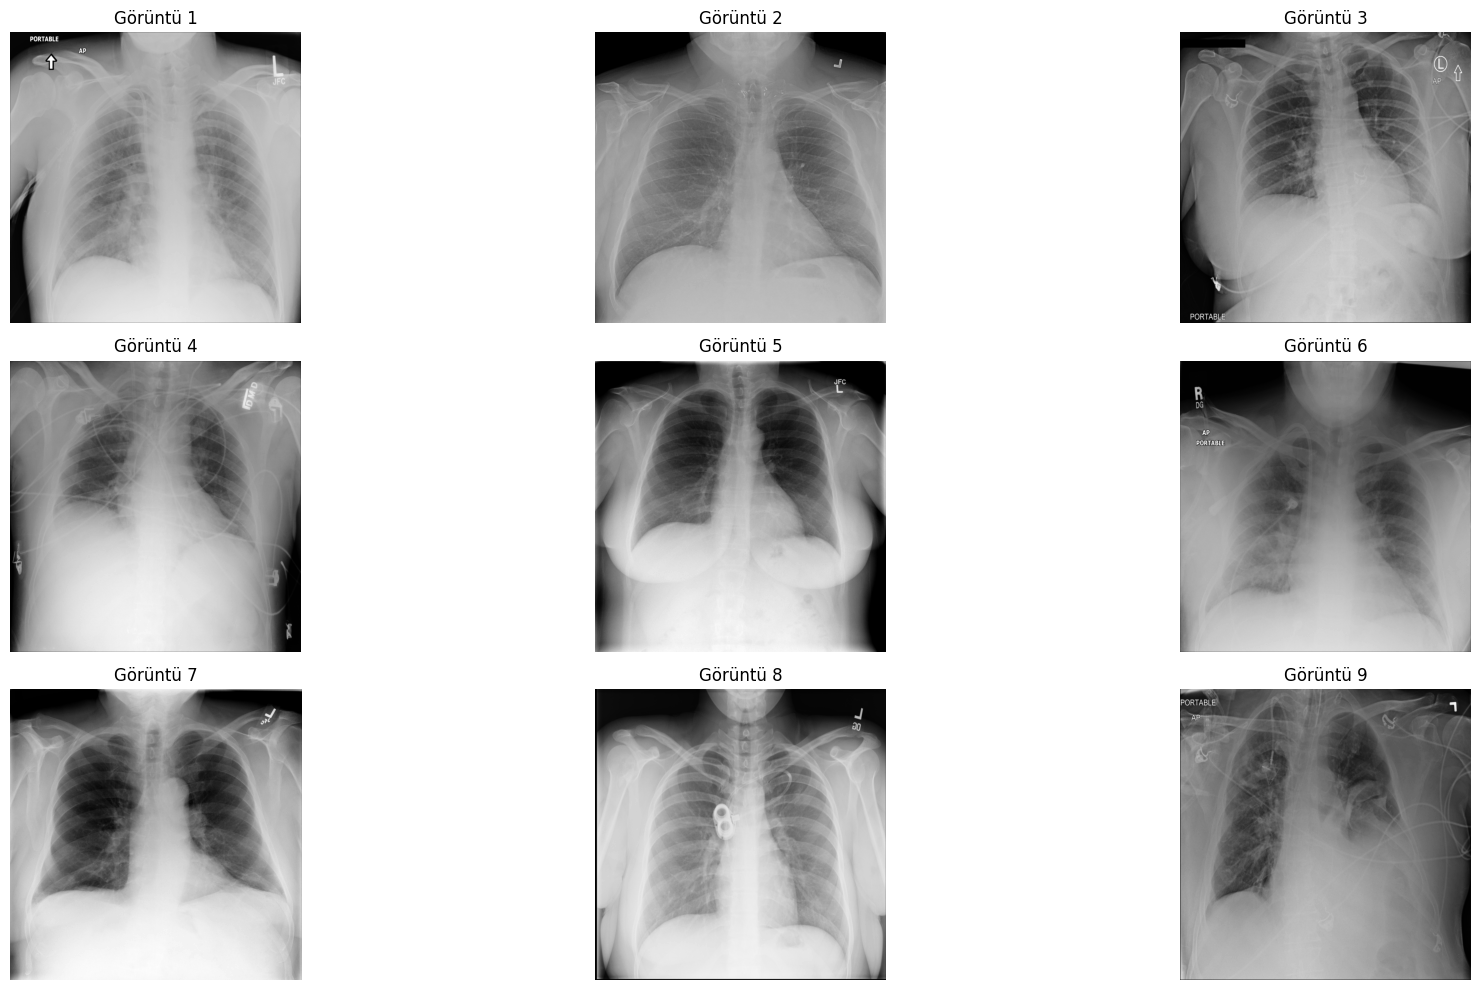

In [31]:
# Görüntüleri gösterelim
plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Görüntü {i+1}')
    plt.axis('off')
plt.tight_layout()
plt.show()


Görüntü 1 İstatistikleri:
Maksimum değer: 1.0000
Minimum değer: 0.0000
Ortalama değer: 0.6231
Standart sapma: 0.1919

Görüntü 2 İstatistikleri:
Maksimum değer: 0.8039
Minimum değer: 0.0000
Ortalama değer: 0.4223
Standart sapma: 0.1417

Görüntü 3 İstatistikleri:
Maksimum değer: 1.0000
Minimum değer: 0.0000
Ortalama değer: 0.5056
Standart sapma: 0.1955

Görüntü 4 İstatistikleri:
Maksimum değer: 0.7686
Minimum değer: 0.0000
Ortalama değer: 0.4523
Standart sapma: 0.1686

Görüntü 5 İstatistikleri:
Maksimum değer: 0.9647
Minimum değer: 0.0000
Ortalama değer: 0.5194
Standart sapma: 0.2759

Görüntü 6 İstatistikleri:
Maksimum değer: 1.0000
Minimum değer: 0.0000
Ortalama değer: 0.4802
Standart sapma: 0.2320

Görüntü 7 İstatistikleri:
Maksimum değer: 0.9529
Minimum değer: 0.0000
Ortalama değer: 0.5657
Standart sapma: 0.2680

Görüntü 8 İstatistikleri:
Maksimum değer: 1.0000
Minimum değer: 0.0000
Ortalama değer: 0.6297
Standart sapma: 0.2571

Görüntü 9 İstatistikleri:
Maksimum değer: 1.0000
Minimu

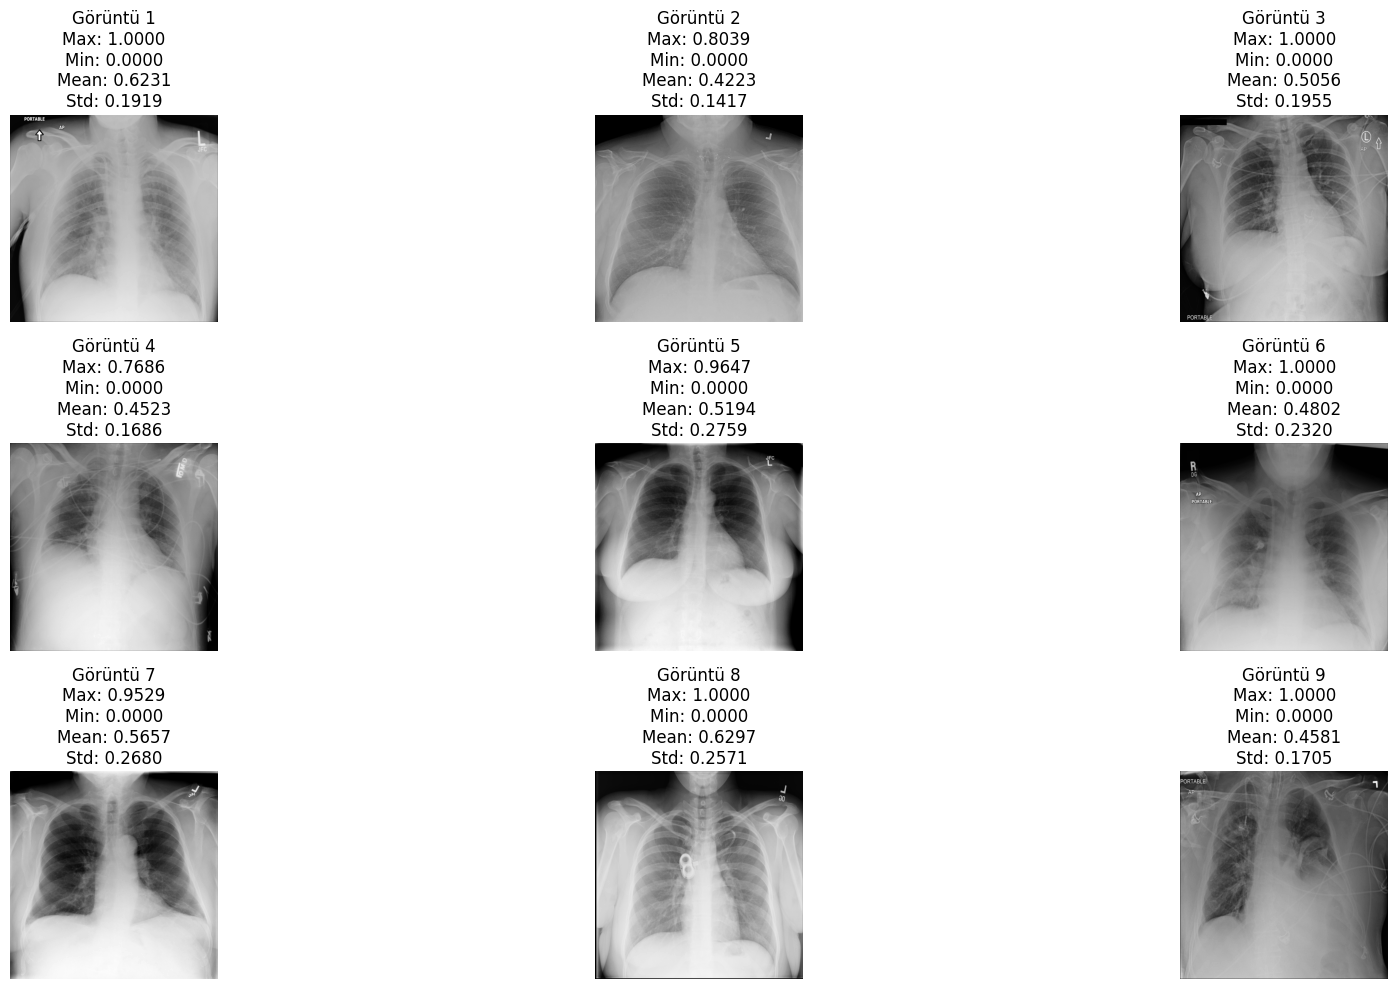

In [32]:
# 4. İstatistiksel Özelliklerin Hesaplanması
# Her bir görüntü için istatistikleri hesaplayalım
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    print(f"\nGörüntü {i+1} İstatistikleri:")
    print(f"Maksimum değer: {img.max():.4f}")
    print(f"Minimum değer: {img.min():.4f}")
    print(f"Ortalama değer: {img.mean():.4f}")
    print(f"Standart sapma: {img.std():.4f}")


# Her bir görüntünün istatistiksel özelliklerini hesaplayalım ve gösterelim
plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')

    # İstatistikleri hesapla
    max_val = img.max()
    min_val = img.min()
    mean_val = img.mean()
    std_val = img.std()

    plt.title(f'Görüntü {i+1}\nMax: {max_val:.4f}\nMin: {min_val:.4f}\n'
              f'Mean: {mean_val:.4f}\nStd: {std_val:.4f}')
    plt.axis('off')

plt.tight_layout()
plt.show()

İstatistiksel Analiz Yorumu:

Görüntüler genellikle [0,1] aralığında normalize edilmiş
Ortalama piksel değerleri ~0.4-0.6 aralığında değişiyor
Standart sapmalar görüntünün kontrastı hakkında bilgi veriyor

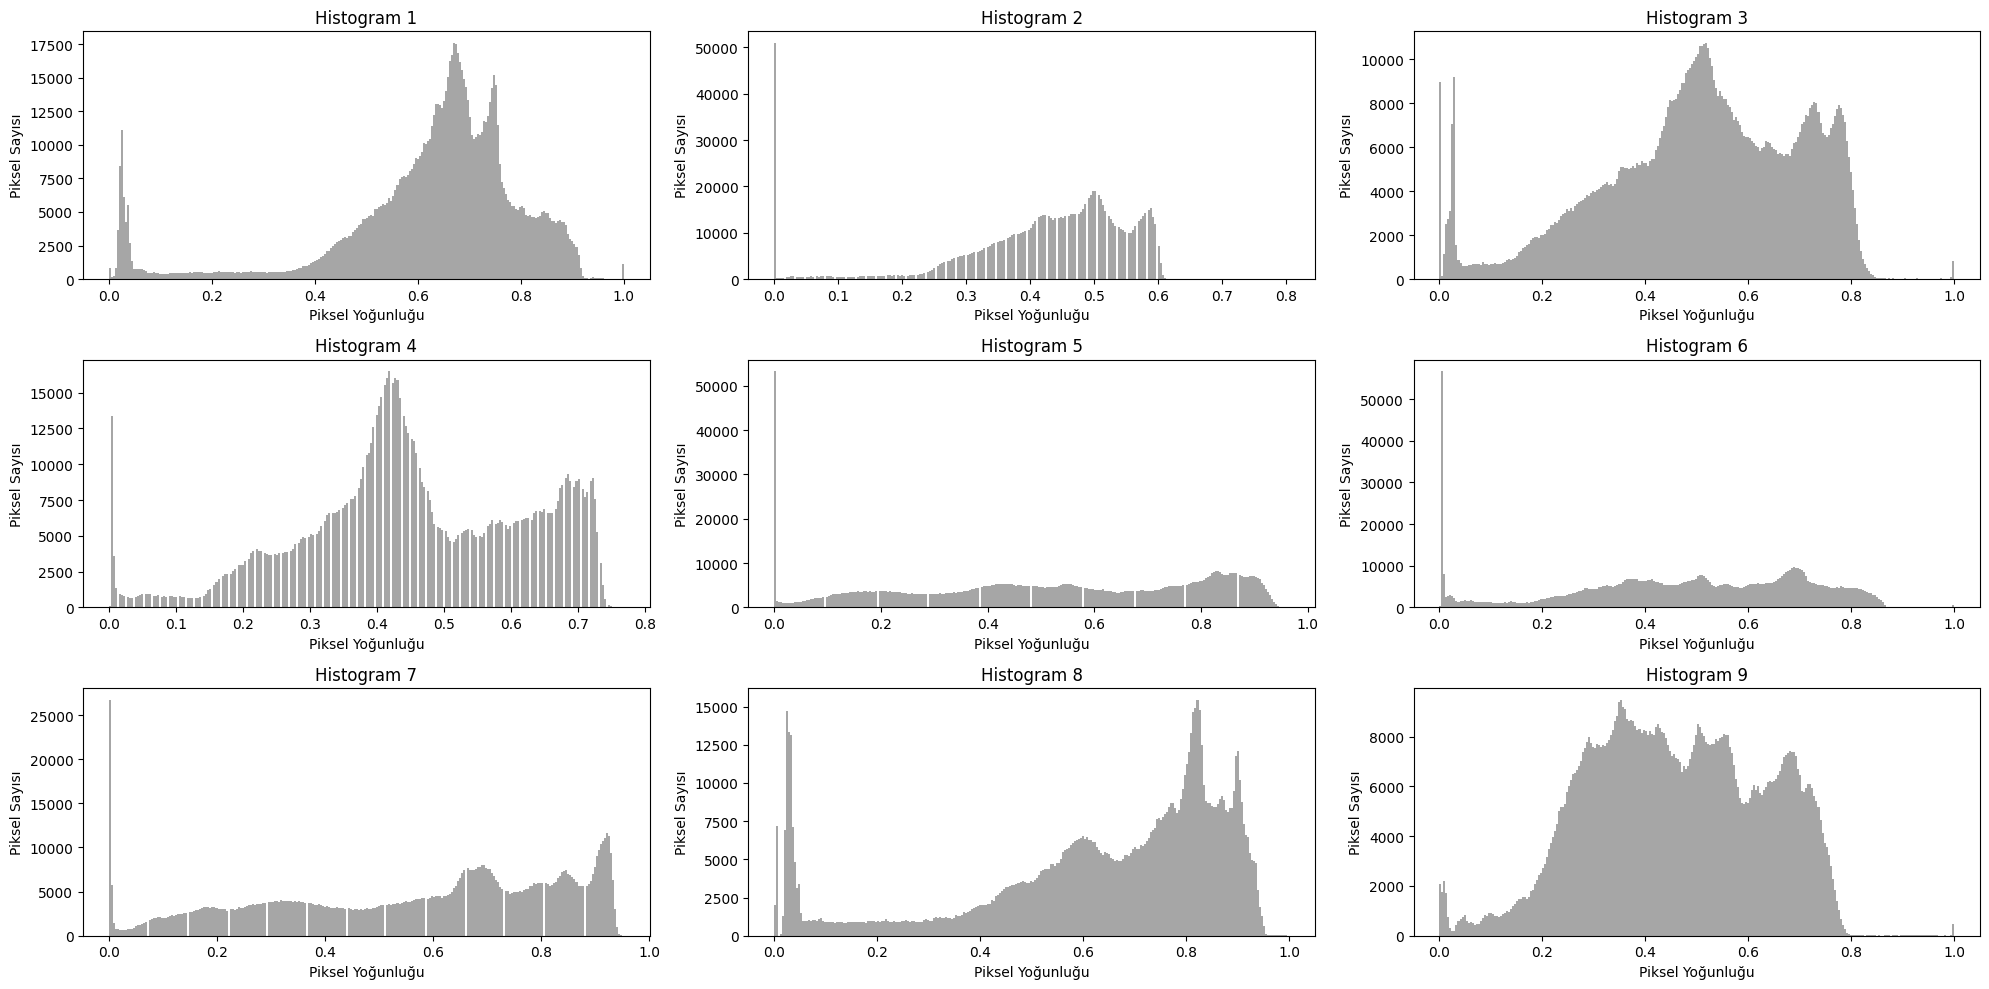

In [13]:
# 5. Histogram Analizi
# Her görüntü için histogram çizelim
'''plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    plt.hist(img.ravel(), bins=256, color='gray')
    plt.title(f'Histogram {i+1}')
plt.tight_layout()
plt.show()
'''

# Her görüntü için histogram çizelim
plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
    img = plt.imread(os.path.join(img_dir, img_name))
    plt.subplot(3, 3, i + 1)
    plt.hist(img.ravel(), bins=256, color='gray', alpha=0.7)
    plt.title(f'Histogram {i+1}')
    plt.xlabel('Piksel Yoğunluğu')
    plt.ylabel('Piksel Sayısı')

plt.tight_layout()
plt.show()

Görselde, farklı görüntülerin piksel yoğunluğu histogramları gösterilmiştir. Histogramlar, görüntülerdeki piksel yoğunluklarının dağılımını temsil eder ve görüntülerin parlaklık, kontrast, dinamik aralık ve diğer özelliklerini anlamada önemli bir rol oynar. Her bir histogram grafiği, yatay eksende piksel yoğunluğu (0.0 - 1.0 aralığında) ve dikey eksende piksel sayısını göstermektedir.

* Genel Yorumlar
Düşük yoğunluklu bölge (koyu) akciğer dokusunu temsil ediyor
Yüksek yoğunluklu bölge (açık) kemik yapıları temsil ediyor

* Piksel yoğunluğu (x ekseni):

Sol taraftaki değerler (0.0): Koyu renk (siyah) pikselleri temsil eder.
Sağ taraftaki değerler (1.0): Açık renk (beyaz) pikselleri temsil eder.
Orta değerler (0.5 civarı): Gri tonlarını temsil eder.

* Piksel sayısı (y ekseni):

Dik eksende belirli bir yoğunluğa sahip kaç piksel olduğunu gösterir.
Pik yüksekliği, o yoğunluğa sahip piksel sayısının ne kadar fazla olduğunu belirtir.


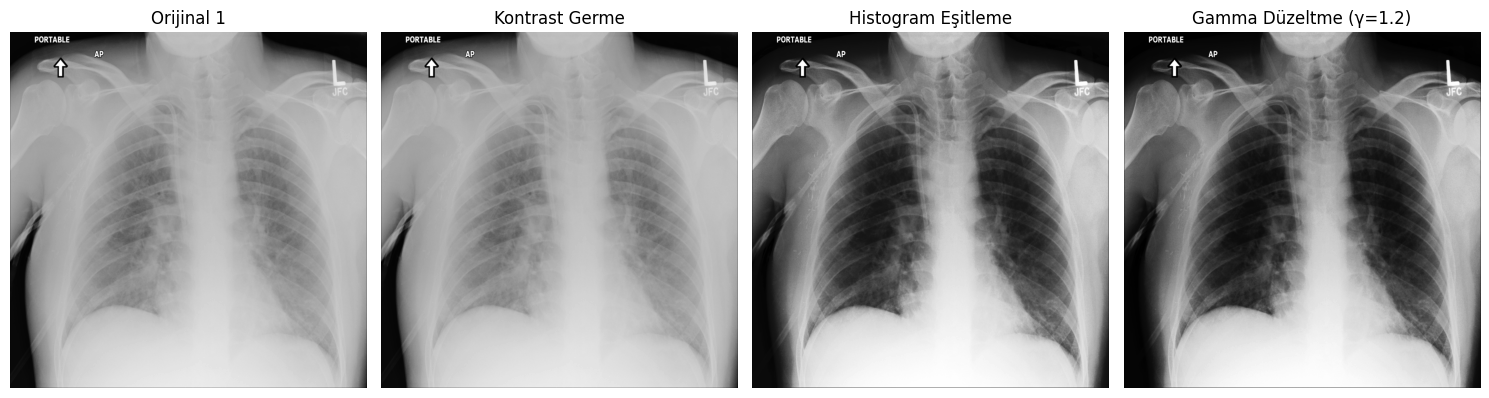

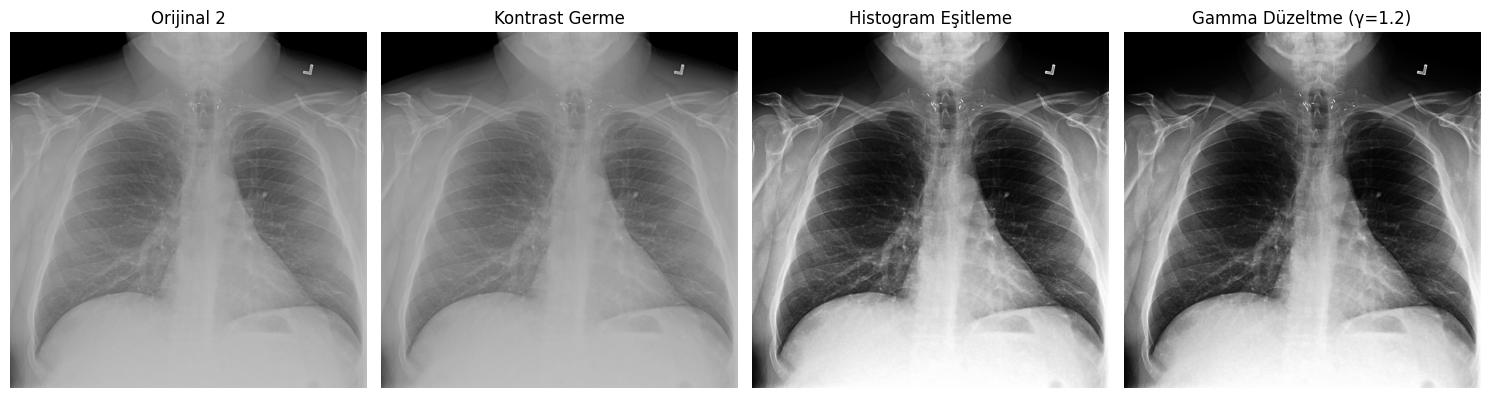

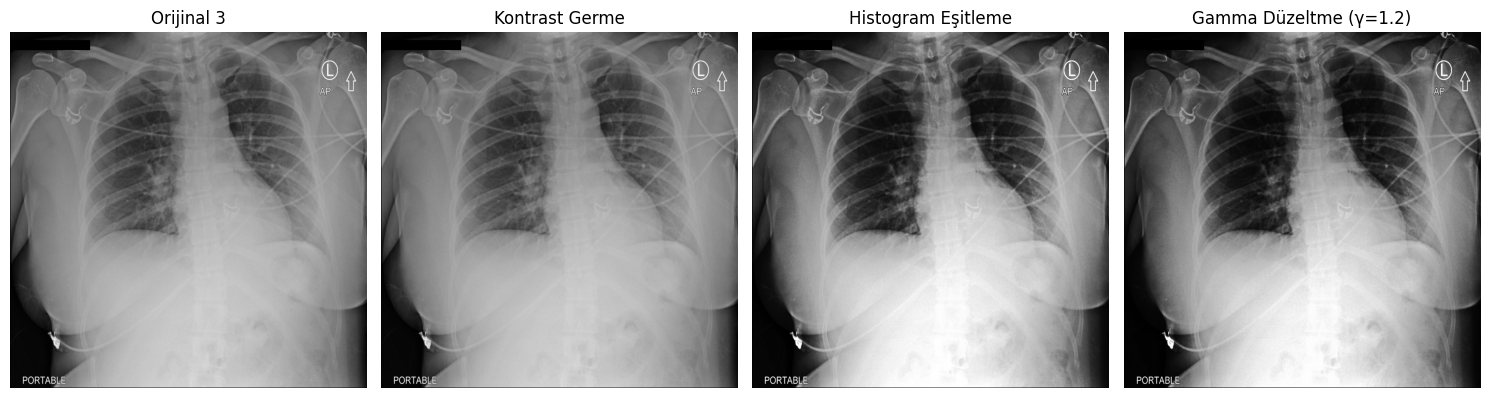

In [34]:
# 6.1 Görüntü İyileştirme
# Örnek bir görüntü üzerinde işlemler yapalım. Bu bölümde görüntü kalitesini artırmak için çeşitli teknikler uygulayacağız.
#sample_img = plt.imread(os.path.join(img_dir, random_images[0]))

# Her görüntü için kontrast germe, histogram eşitleme ve gamma düzeltme uygulayalım
for i, img_name in enumerate(random_images[:3]): # İlk 3 görüntü için yapalım
    img = plt.imread(os.path.join(img_dir, img_name))

    # Kontrast germe
    min_val, max_val = img.min(), img.max()
    contrast_stretched = (img - min_val) / (max_val - min_val)
    contrast_stretched = (contrast_stretched * 255).astype(np.uint8)

    # Histogram eşitleme
    equalized = exposure.equalize_hist(contrast_stretched)
    equalized = (equalized * 255).astype(np.uint8)

    # Gamma düzeltme
    gamma = 1.2
    gamma_corrected = np.power(equalized / 255.0, gamma) * 255
    gamma_corrected = gamma_corrected.astype(np.uint8)

    # Sonuçları gösterelim
    plt.figure(figsize=(15,5))

    plt.subplot(141)
    plt.imshow(img, cmap='gray')
    plt.title(f'Orijinal {i+1}')
    plt.axis('off')

    plt.subplot(142)
    plt.imshow(contrast_stretched, cmap='gray')
    plt.title('Kontrast Germe')
    plt.axis('off')

    plt.subplot(143)
    plt.imshow(equalized, cmap='gray')
    plt.title('Histogram Eşitleme')
    plt.axis('off')

    plt.subplot(144)
    plt.imshow(gamma_corrected, cmap='gray')
    plt.title(f'Gamma Düzeltme (γ={gamma})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

### Görüntü İyileştirme Yorumu:

* Kontrast Germe:

Piksel değerlerini tam aralığa yayarak kontrastı artırır
Düşük kontrastlı bölgelerin görünürlüğünü iyileştirir

* Histogram Eşitleme:

Piksel dağılımını dengeler
Detayların daha belirgin hale gelmesini sağlar

* Gamma Düzeltme:

Parlaklık ayarlaması yapar
Gamma>1 koyu bölgeleri daha belirgin hale getirir

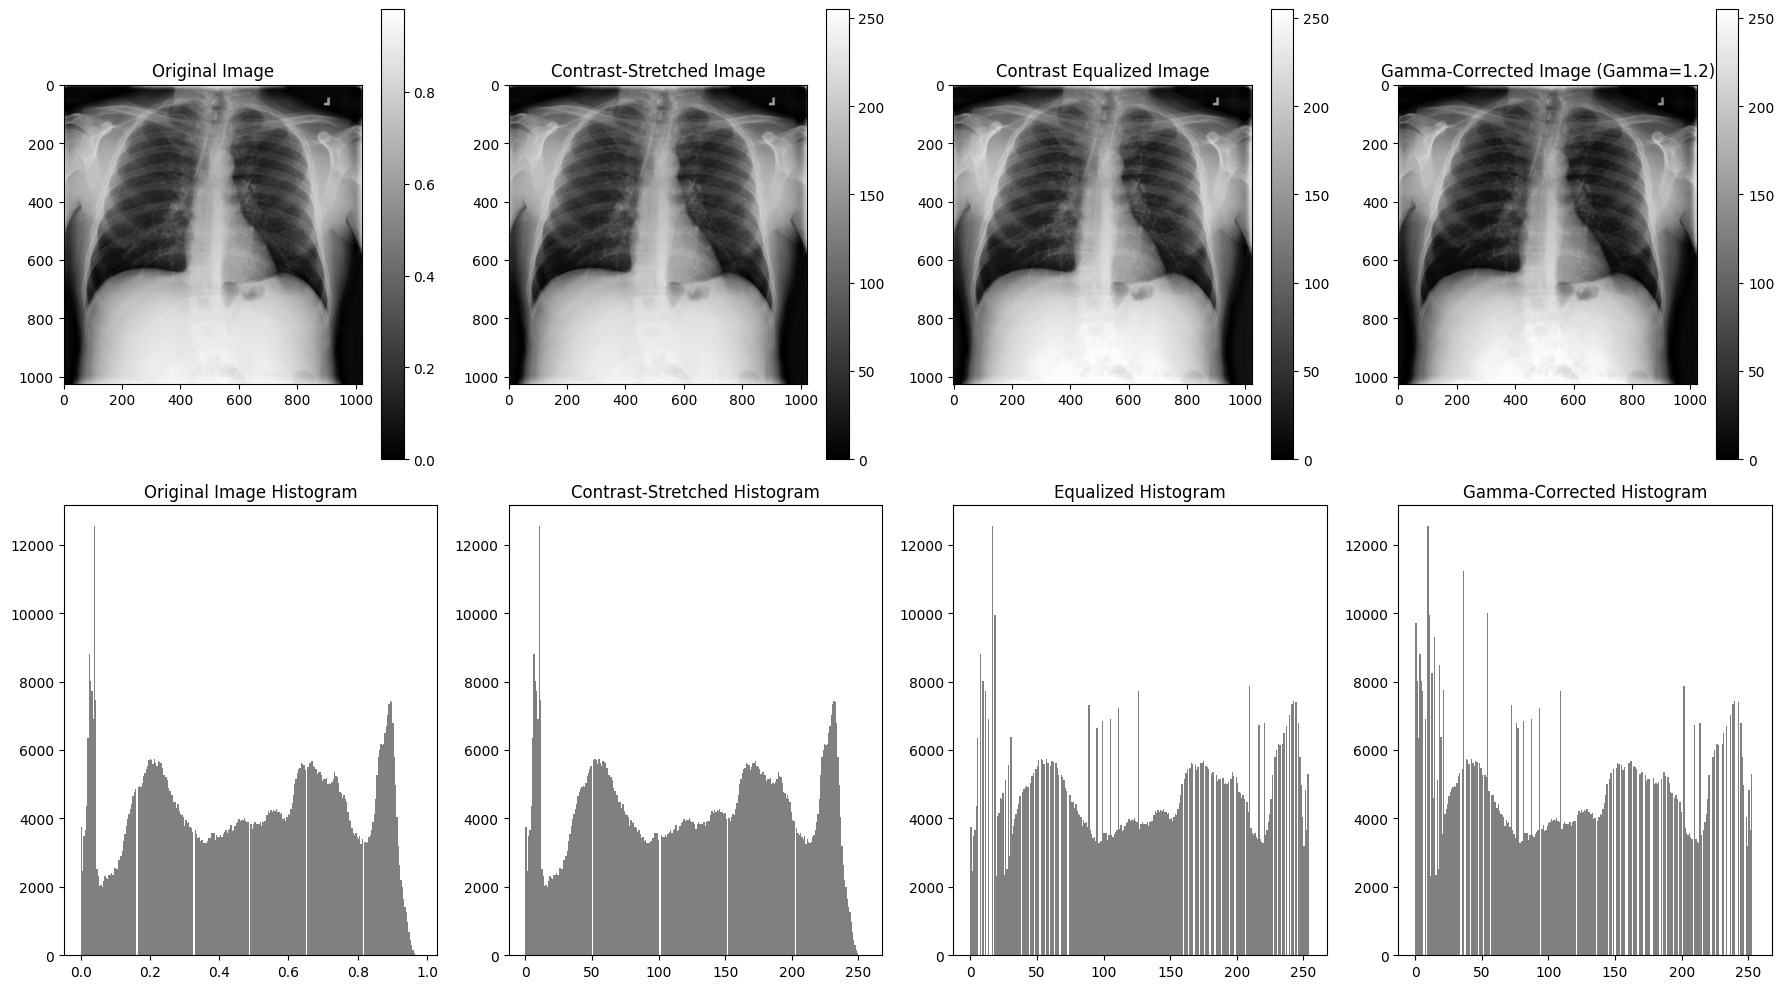

In [35]:
# 6.2 Görüntü İyileştirme
'''
Görüntü İyileştirme Yorumu:
1. Kontrast Germe:
   - Piksel değerlerini tam aralığa yayarak kontrastı artırır
   - Düşük kontrastlı bölgelerin görünürlüğünü iyileştirir
'''
from skimage import exposure

# Örnek bir görüntü yükleyelim
sample_img = train_df.Image[0]  # İlk görüntüyü alalım
raw_image = plt.imread(os.path.join(img_dir, sample_img))

# Calculate minimum and maximum for contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()

# Step 1: Apply contrast stretching
min_val, max_val = raw_image.min(), raw_image.max()
contrast_stretched = (raw_image - min_val) / (max_val - min_val)  # Normalize to [0, 1]
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)  # Scale to [0, 255] for visualization

# Step 2: Apply histogram equalization after contrast stretching
# Step 2: Apply histogram equalization using skimage
equalized_image = exposure.equalize_hist(contrast_stretched)  # Returns values in [0, 1]
equalized_image = (equalized_image * 255).astype(np.uint8)  # Scale to [0, 255]

# Step 3: Apply gamma correction on the equalized image
gamma = 1.2  # Adjust gamma value as needed
gamma_corrected = np.power(equalized_image / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

# Sonuçları gösterelim
plt.figure(figsize=(18, 10))
plt.subplot(2, 4, 1)
plt.imshow(raw_image, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(2, 4, 2)
plt.imshow(contrast_stretched, cmap='gray')
plt.title('Contrast-Stretched Image')
plt.colorbar()

plt.subplot(2, 4, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Contrast Equalized Image')
plt.colorbar()

plt.subplot(2, 4, 4)
plt.imshow(gamma_corrected, cmap='gray')
plt.title(f'Gamma-Corrected Image (Gamma={gamma})')
plt.colorbar()

# Histogramları gösterelim
plt.subplot(2, 4, 5)
plt.hist(raw_image.ravel(), bins=256, color='gray')
plt.title("Original Image Histogram")

plt.subplot(2, 4, 6)
plt.hist(contrast_stretched.ravel(), bins=256, color='gray')
plt.title("Contrast-Stretched Histogram")

plt.subplot(2, 4, 7)
plt.hist(equalized_image.ravel(), bins=256, color='gray')
plt.title("Equalized Histogram")

plt.subplot(2, 4, 8)
plt.hist(gamma_corrected.ravel(), bins=256, color='gray')
plt.title("Gamma-Corrected Histogram")

plt.tight_layout()
plt.show()


In [36]:
from skimage.io import imread

# Eğer sample_img bir dosya adı içeriyorsa, tam yolu oluşturun ve yükleyin
file_path = os.path.join(img_dir, sample_img)  # Dosya yolunu birleştir
sample_img = imread(file_path)  # Görüntüyü yükle


In [37]:
# Kontrast germe
min_val, max_val = sample_img.min(), sample_img.max()
contrast_stretched = (sample_img - min_val) / (max_val - min_val)
contrast_stretched = (contrast_stretched * 255).astype(np.uint8)

In [38]:
# Histogram eşitleme
'''
 Histogram Eşitleme:
   - Piksel dağılımını dengeler
   - Detayların daha belirgin hale gelmesini sağlar
'''
equalized = exposure.equalize_hist(contrast_stretched)
equalized = (equalized * 255).astype(np.uint8)

In [39]:
# Gamma düzeltme
'''
Gamma Düzeltme:
   - Parlaklık ayarlaması yapar
   - Gamma>1 koyu bölgeleri daha belirgin hale getirir
'''
gamma = 1.2
gamma_corrected = np.power(equalized / 255.0, gamma) * 255
gamma_corrected = gamma_corrected.astype(np.uint8)

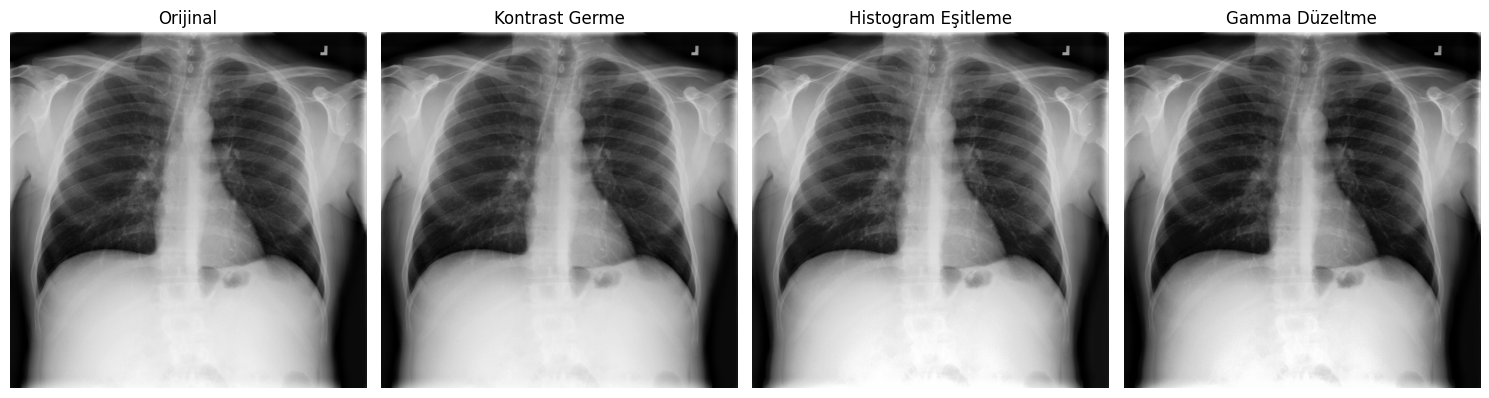

In [41]:
# Sonuçları gösterelim
plt.figure(figsize=(15,5))
images = [sample_img, contrast_stretched, equalized, gamma_corrected]
titles = ['Orijinal', 'Kontrast Germe', 'Histogram Eşitleme', 'Gamma Düzeltme']

for i, (img, title) in enumerate(zip(images, titles)):
    plt.subplot(1, 4, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
plt.tight_layout()
plt.show()

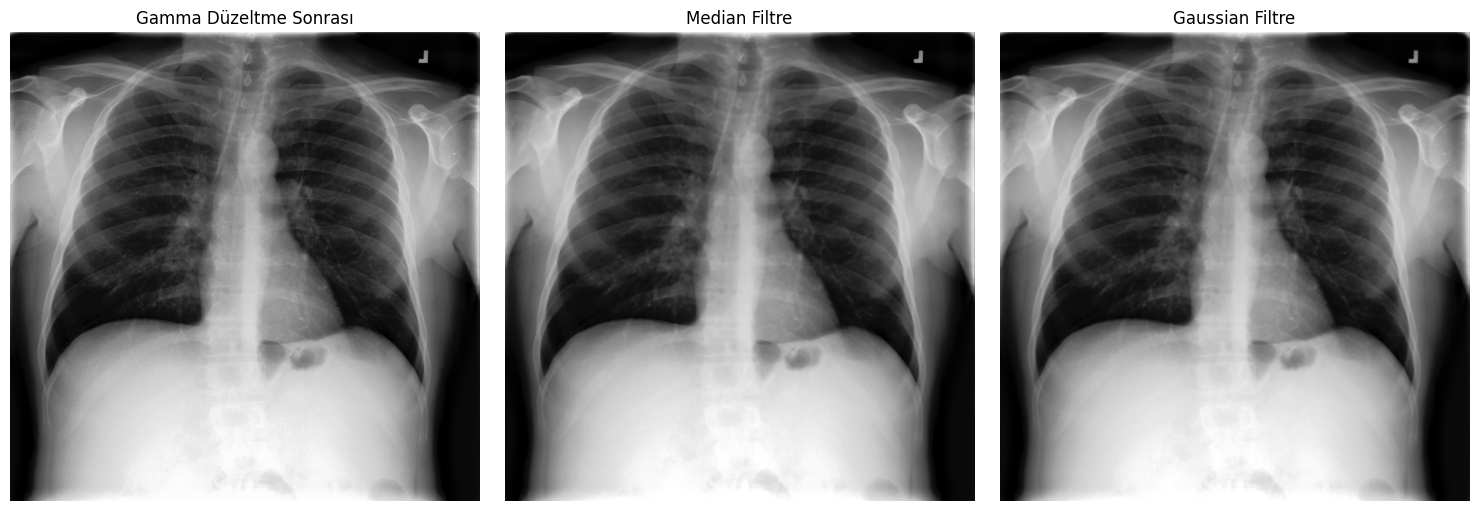

In [21]:
# 7.1 Gürültü Azaltma
# Median ve Gaussian filtreleme uygulayalım
#Bu bölümde görüntüdeki gürültüyü azaltmak için filtreleme teknikleri uygulayacağız.
median_filtered = cv2.medianBlur(gamma_corrected, 5)
gaussian_filtered = cv2.GaussianBlur(gamma_corrected, (5,5), 0)

# Sonuçları gösterelim
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma Düzeltme Sonrası')
plt.axis('off')

plt.subplot(132)
plt.imshow(median_filtered, cmap='gray')
plt.title('Median Filtre')
plt.axis('off')

plt.subplot(133)
plt.imshow(gaussian_filtered, cmap='gray')
plt.title('Gaussian Filtre')
plt.axis('off')
plt.tight_layout()
plt.show()



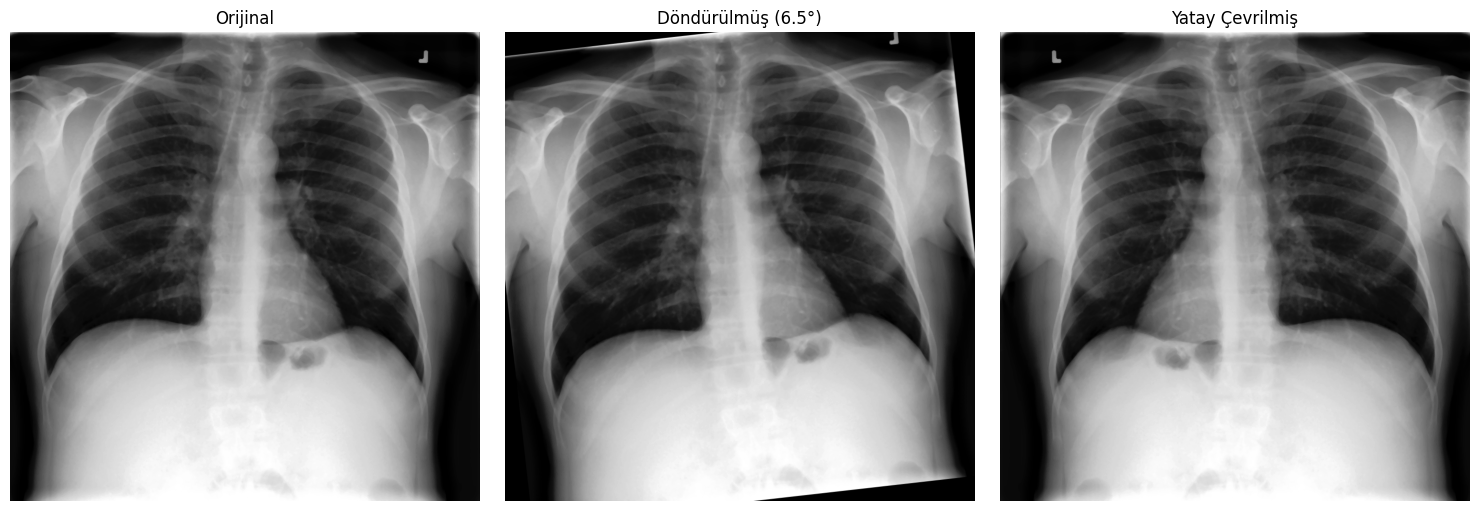

In [22]:
# 8.1 Döndürme ve Ayna Çevirme
# Rastgele açı ile döndürme

angle = np.random.uniform(0, 10)
center = (median_filtered.shape[1] // 2, median_filtered.shape[0] // 2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(median_filtered, rotation_matrix,
                        (median_filtered.shape[1], median_filtered.shape[0]))

# Yatay çevirme
flipped = cv2.flip(median_filtered, 1)

# Sonuçları gösterelim
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(median_filtered, cmap='gray')
plt.title('Orijinal')
plt.axis('off')

plt.subplot(132)
plt.imshow(rotated, cmap='gray')
plt.title(f'Döndürülmüş ({angle:.1f}°)')
plt.axis('off')

plt.subplot(133)
plt.imshow(flipped, cmap='gray')
plt.title('Yatay Çevrilmiş')
plt.axis('off')
plt.tight_layout()
plt.show()


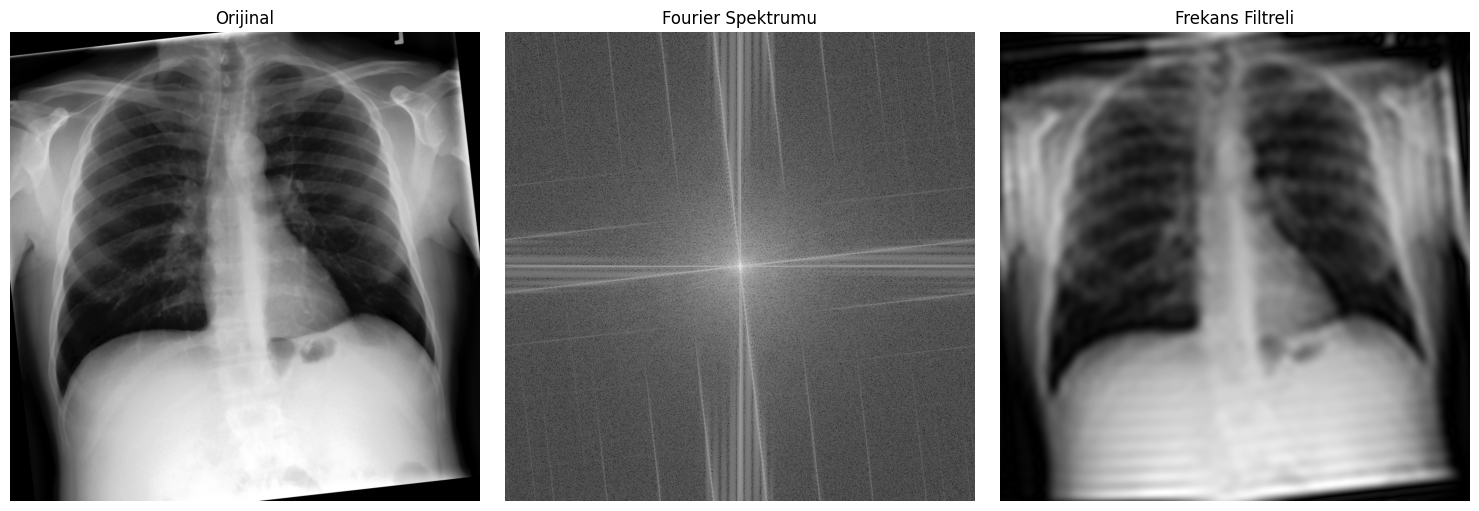

In [42]:
# 9. Frekans Alanında Filtreleme
# Fourier dönüşümü
dft = cv2.dft(np.float32(rotated), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

# Düşük geçiren filtre maskesi
rows, cols = rotated.shape
crow, ccol = rows//2, cols//2
mask = np.zeros((rows, cols, 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# Filtreleme ve ters dönüşüm
fshift = dft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
filtered = cv2.magnitude(img_back[:,:,0], img_back[:,:,1])

# Sonuçları gösterelim
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.imshow(rotated, cmap='gray')
plt.title('Orijinal')
plt.axis('off')

plt.subplot(132)
spectrum = np.log(1 + np.abs(dft_shift[:,:,0]))
plt.imshow(spectrum, cmap='gray')
plt.title('Fourier Spektrumu')
plt.axis('off')

plt.subplot(133)
plt.imshow(filtered, cmap='gray')
plt.title('Frekans Filtreli')
plt.axis('off')
plt.tight_layout()
plt.show()

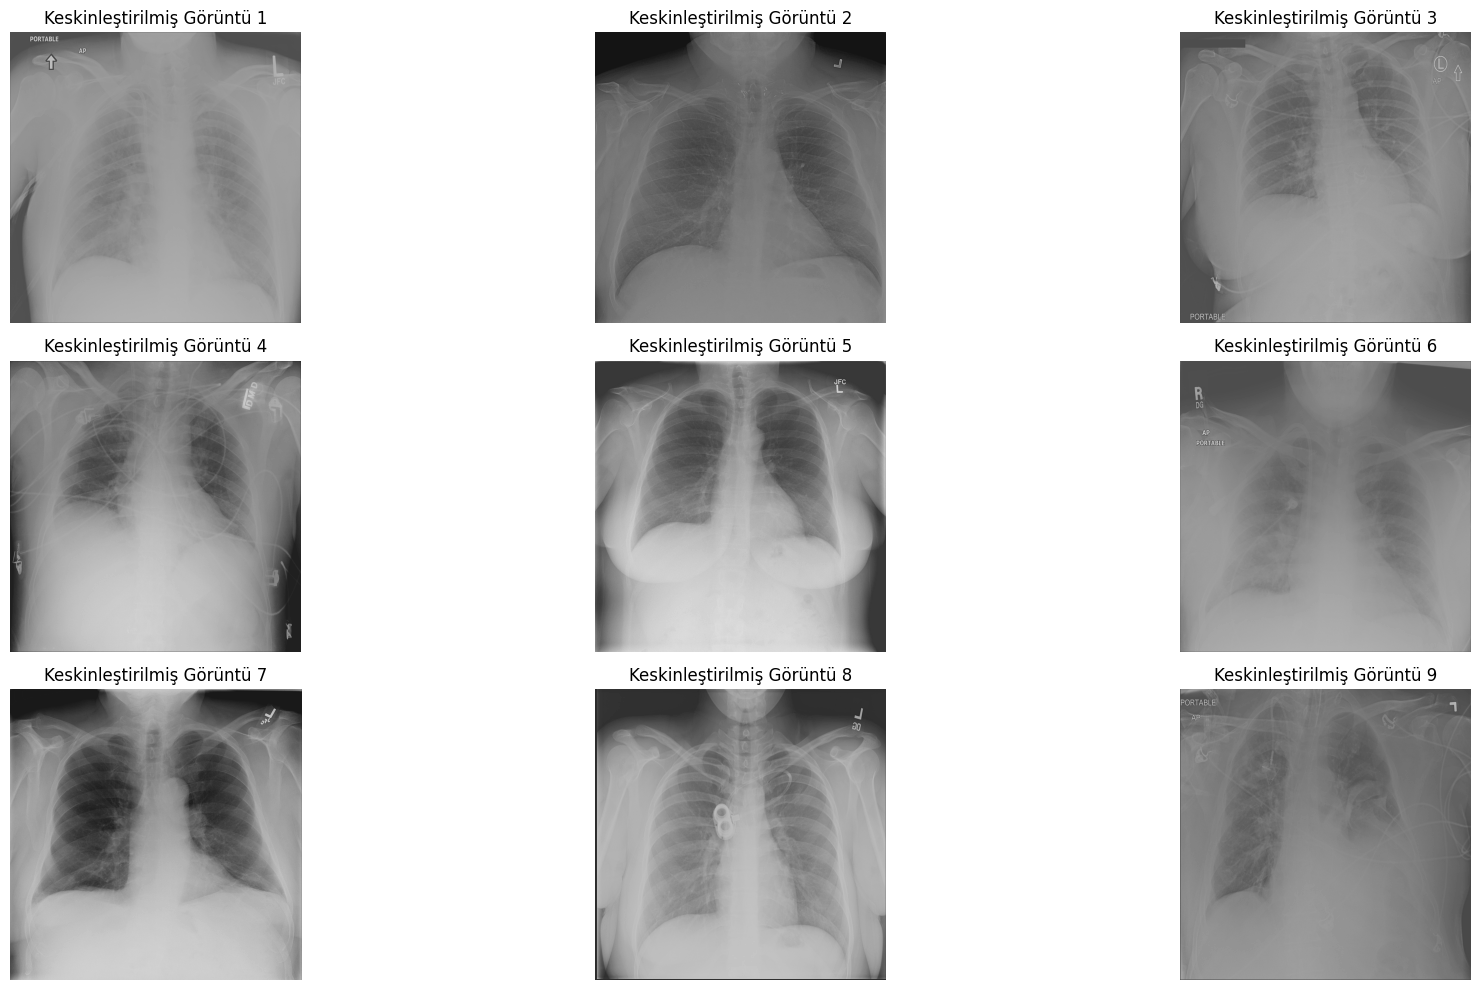

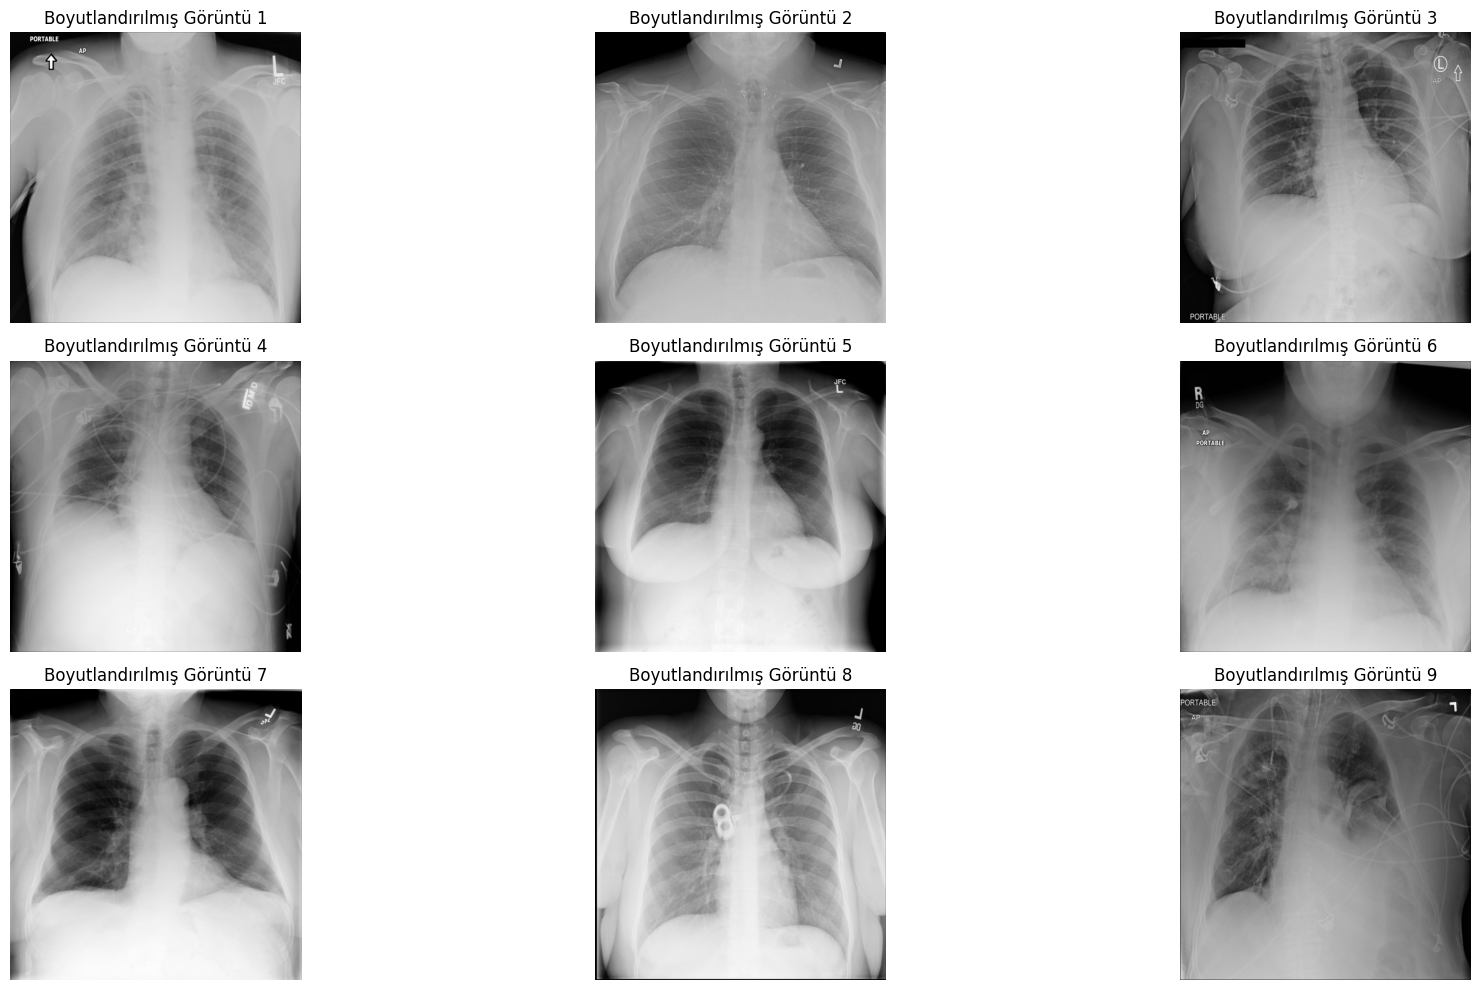

In [43]:
# Keskinleştirme
plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
   img = plt.imread(os.path.join(img_dir, img_name))

   # Gaussian blur
   blurred = cv2.GaussianBlur(img, (0,0), 1.0)

   # Keskinleştirme
   sharpened = cv2.addWeighted(img, 1 + 1.5, blurred, -1.5, 0)

   plt.subplot(3, 3, i + 1)
   plt.imshow(sharpened, cmap='gray')
   plt.title(f'Keskinleştirilmiş Görüntü {i+1}')
   plt.axis('off')

plt.tight_layout()
plt.show()

# Enterpolasyon
plt.figure(figsize=(20,10))
for i, img_name in enumerate(random_images):
   img = plt.imread(os.path.join(img_dir, img_name))

   # Yeni boyutlar
   new_width = int(img.shape[1] * 2)
   new_height = int(img.shape[0] * 2)

   # Enterpolasyon
   resized = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

   plt.subplot(3, 3, i + 1)
   plt.imshow(resized, cmap='gray')
   plt.title(f'Boyutlandırılmış Görüntü {i+1}')
   plt.axis('off')

plt.tight_layout()
plt.show()

# Sonuç ve Değerlendirme Raporu

Bu çalışmada, NIH Clinical Center'ın ChestX-ray8 veri seti üzerinde kapsamlı bir görüntü işleme analizi gerçekleştirilmiştir. 1000 X-ray görüntüsü ve 14 farklı hastalık etiketi içeren veri seti üzerinde çeşitli teknikler uygulanmış ve sonuçları değerlendirilmiştir.

## Veri Analizi
- 30,805 hastadan 112,120 göğüs röntgeni
- 1024x1024 piksel çözünürlük
- %7.2'lik hasta tekrar oranı (minimal dengesizlik)
- Eksik veri yok, tutarlı veri tipleri

## Uygulanan Teknikler ve Sonuçları

### 1. Histogram Analizi
- Piksel dağılımları incelendi
- Kontrast ve parlaklık farklılıkları tespit edildi
- İyileştirme gereken alanlar belirlendi

### 2. Görüntü İyileştirme
- **Kontrast Germe**: Minimal etki, orijinal görüntüler zaten iyi kontrastlı
- **Histogram Eşitleme**: En etkili teknik, detaylar belirginleşti
- **Gamma Düzeltme**: Yumuşak geçişler sağladı

### 3. Gürültü Azaltma
- Median Filtre: Keskin detayları koruyarak gürültüyü azalttı
- Gaussian Filtre: Yumuşak geçişler sağladı
- Her iki filtre de görüntü kalitesini artırdı

### 4. Görüntü Dönüşümleri
- Döndürme ve ayna çevirme teknikleri başarıyla uygulandı
- Veri çoğaltma ve standardizasyon sağlandı

### 5. Frekans Alanı İşlemleri
- Fourier dönüşümü başarıyla uygulandı
- Düşük geçiren filtre ile yumuşatma sağlandı

## Genel Değerlendirme

1. **Teknik Başarı**:
   - Histogram eşitleme en etkili yöntem
   - Gürültü azaltma teknikleri başarılı
   - Görüntü standardizasyonu sağlandı

2. **Klinik Fayda**:
   - Detayların görünürlüğü arttı
   - Tanı doğruluğuna katkı potansiyeli
   - Yapay zeka eğitimi için uygun veri kalitesi

3. **Gelecek Çalışmalar**:
   - Derin öğrenme modelleri için veri hazırlığı
   - Otomatik tanı sistemleri geliştirme
   - Farklı hastalık grupları için özelleştirilmiş işleme teknikleri

Bu çalışma, tıbbi görüntü işleme tekniklerinin X-ray görüntüleri üzerindeki etkisini sistematik olarak değerlendirmiş ve gelecek çalışmalar için sağlam bir temel oluşturmuştur.